In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Activation ,Dense, Conv2D, MaxPooling2D, Softmax, Dropout, Flatten
# from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import zeros, TruncatedNormal
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import random as r
import pydot
import os
import gzip
import graphviz
import time
classes = 47


In [2]:
# asci_to_id = {}
id_to_asci = {}
with open("gzip/emnist-balanced-mapping.txt") as f:
        for row in f.readlines():
                i,asci = row.split()
                i = int(i)
                asci = int(asci)
                # asci_to_id[asci]=i
                id_to_asci[i]   =asci

In [ ]:
id_to_asci 

In [46]:
def onehot(asci):
        x = np.zeros(classes) #mnist
        x[int(asci)]=1.0
        return x

def load_mnist(kind='train'):
    path="gzip/emnist-balanced-"
    labels_path = path + kind + "-labels-idx1-ubyte" + ".gz"
    images_path = path + kind + "-images-idx3-ubyte" + ".gz"

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                            offset=8)
        labels = np.array([onehot(label) for label in labels])

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                            offset=16).reshape((-1,28,28,1))
        images = np.array([np.transpose(img) for img in images])
        images = images.reshape((-1,28,28,1))

    return images, labels

In [47]:
images,labels = load_mnist()
split = int(0.8 * len(labels))
x_train = images[:split]
y_train = labels[:split]
x_val =   images[split:]
y_val =   labels[split:]

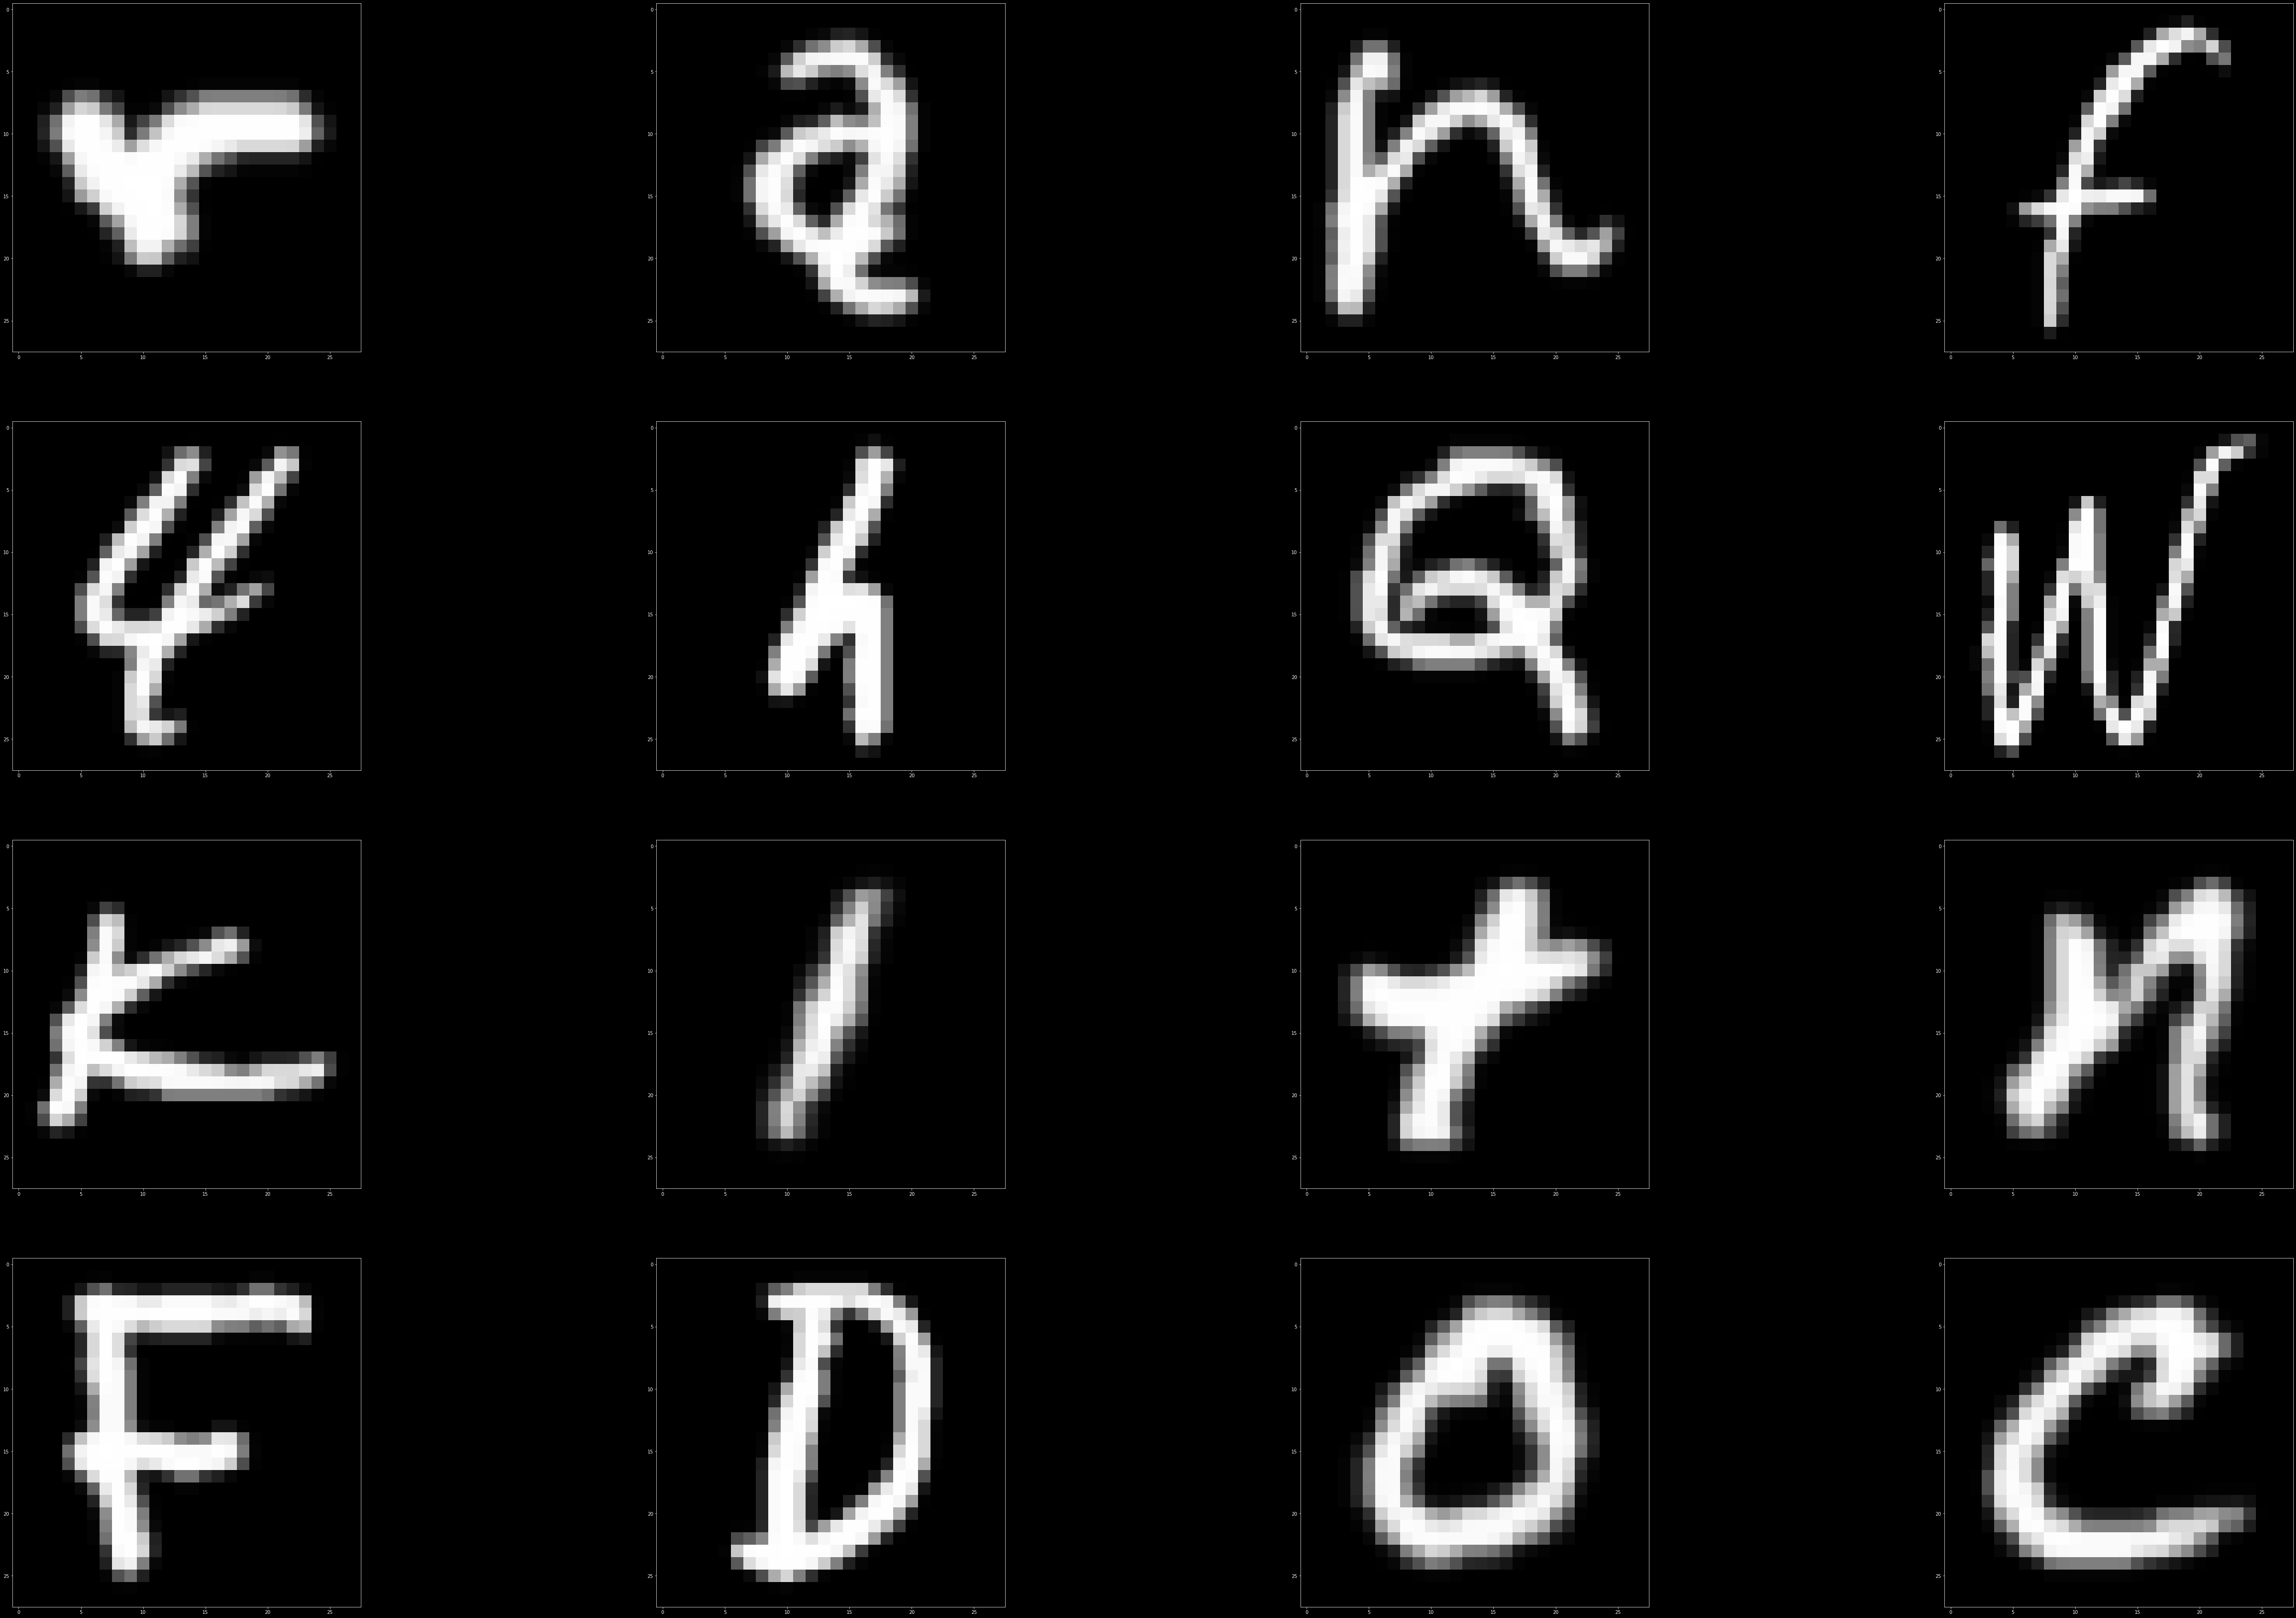

In [38]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


i = 0
imgs = []
for l,v in zip(labels,images):
        if True:
                v = np.reshape(np.array(v),(28,28))
                imgs.append(v)
                i = i + 1
        if i == 16:
                break

show_images(imgs,cols=4)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


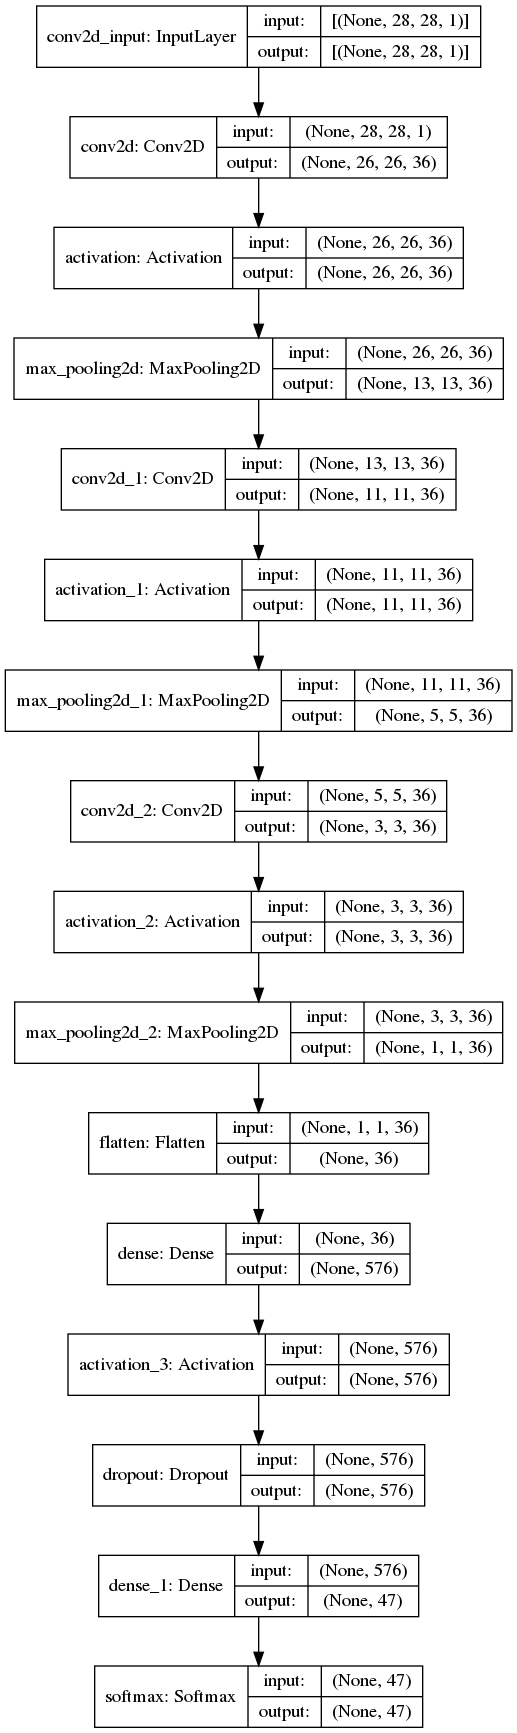

In [39]:
model = Sequential()
model.add(Conv2D(36,3,input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(36,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(36,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(576))
model.add(Activation("relu"))
model.add(Dropout(0.33))
model.add(Dense(classes))
model.add(Softmax())
model.compile("Nadam",loss="categorical_crossentropy",metrics=["accuracy"])
plot_model(model, to_file='model.png',show_shapes=True)

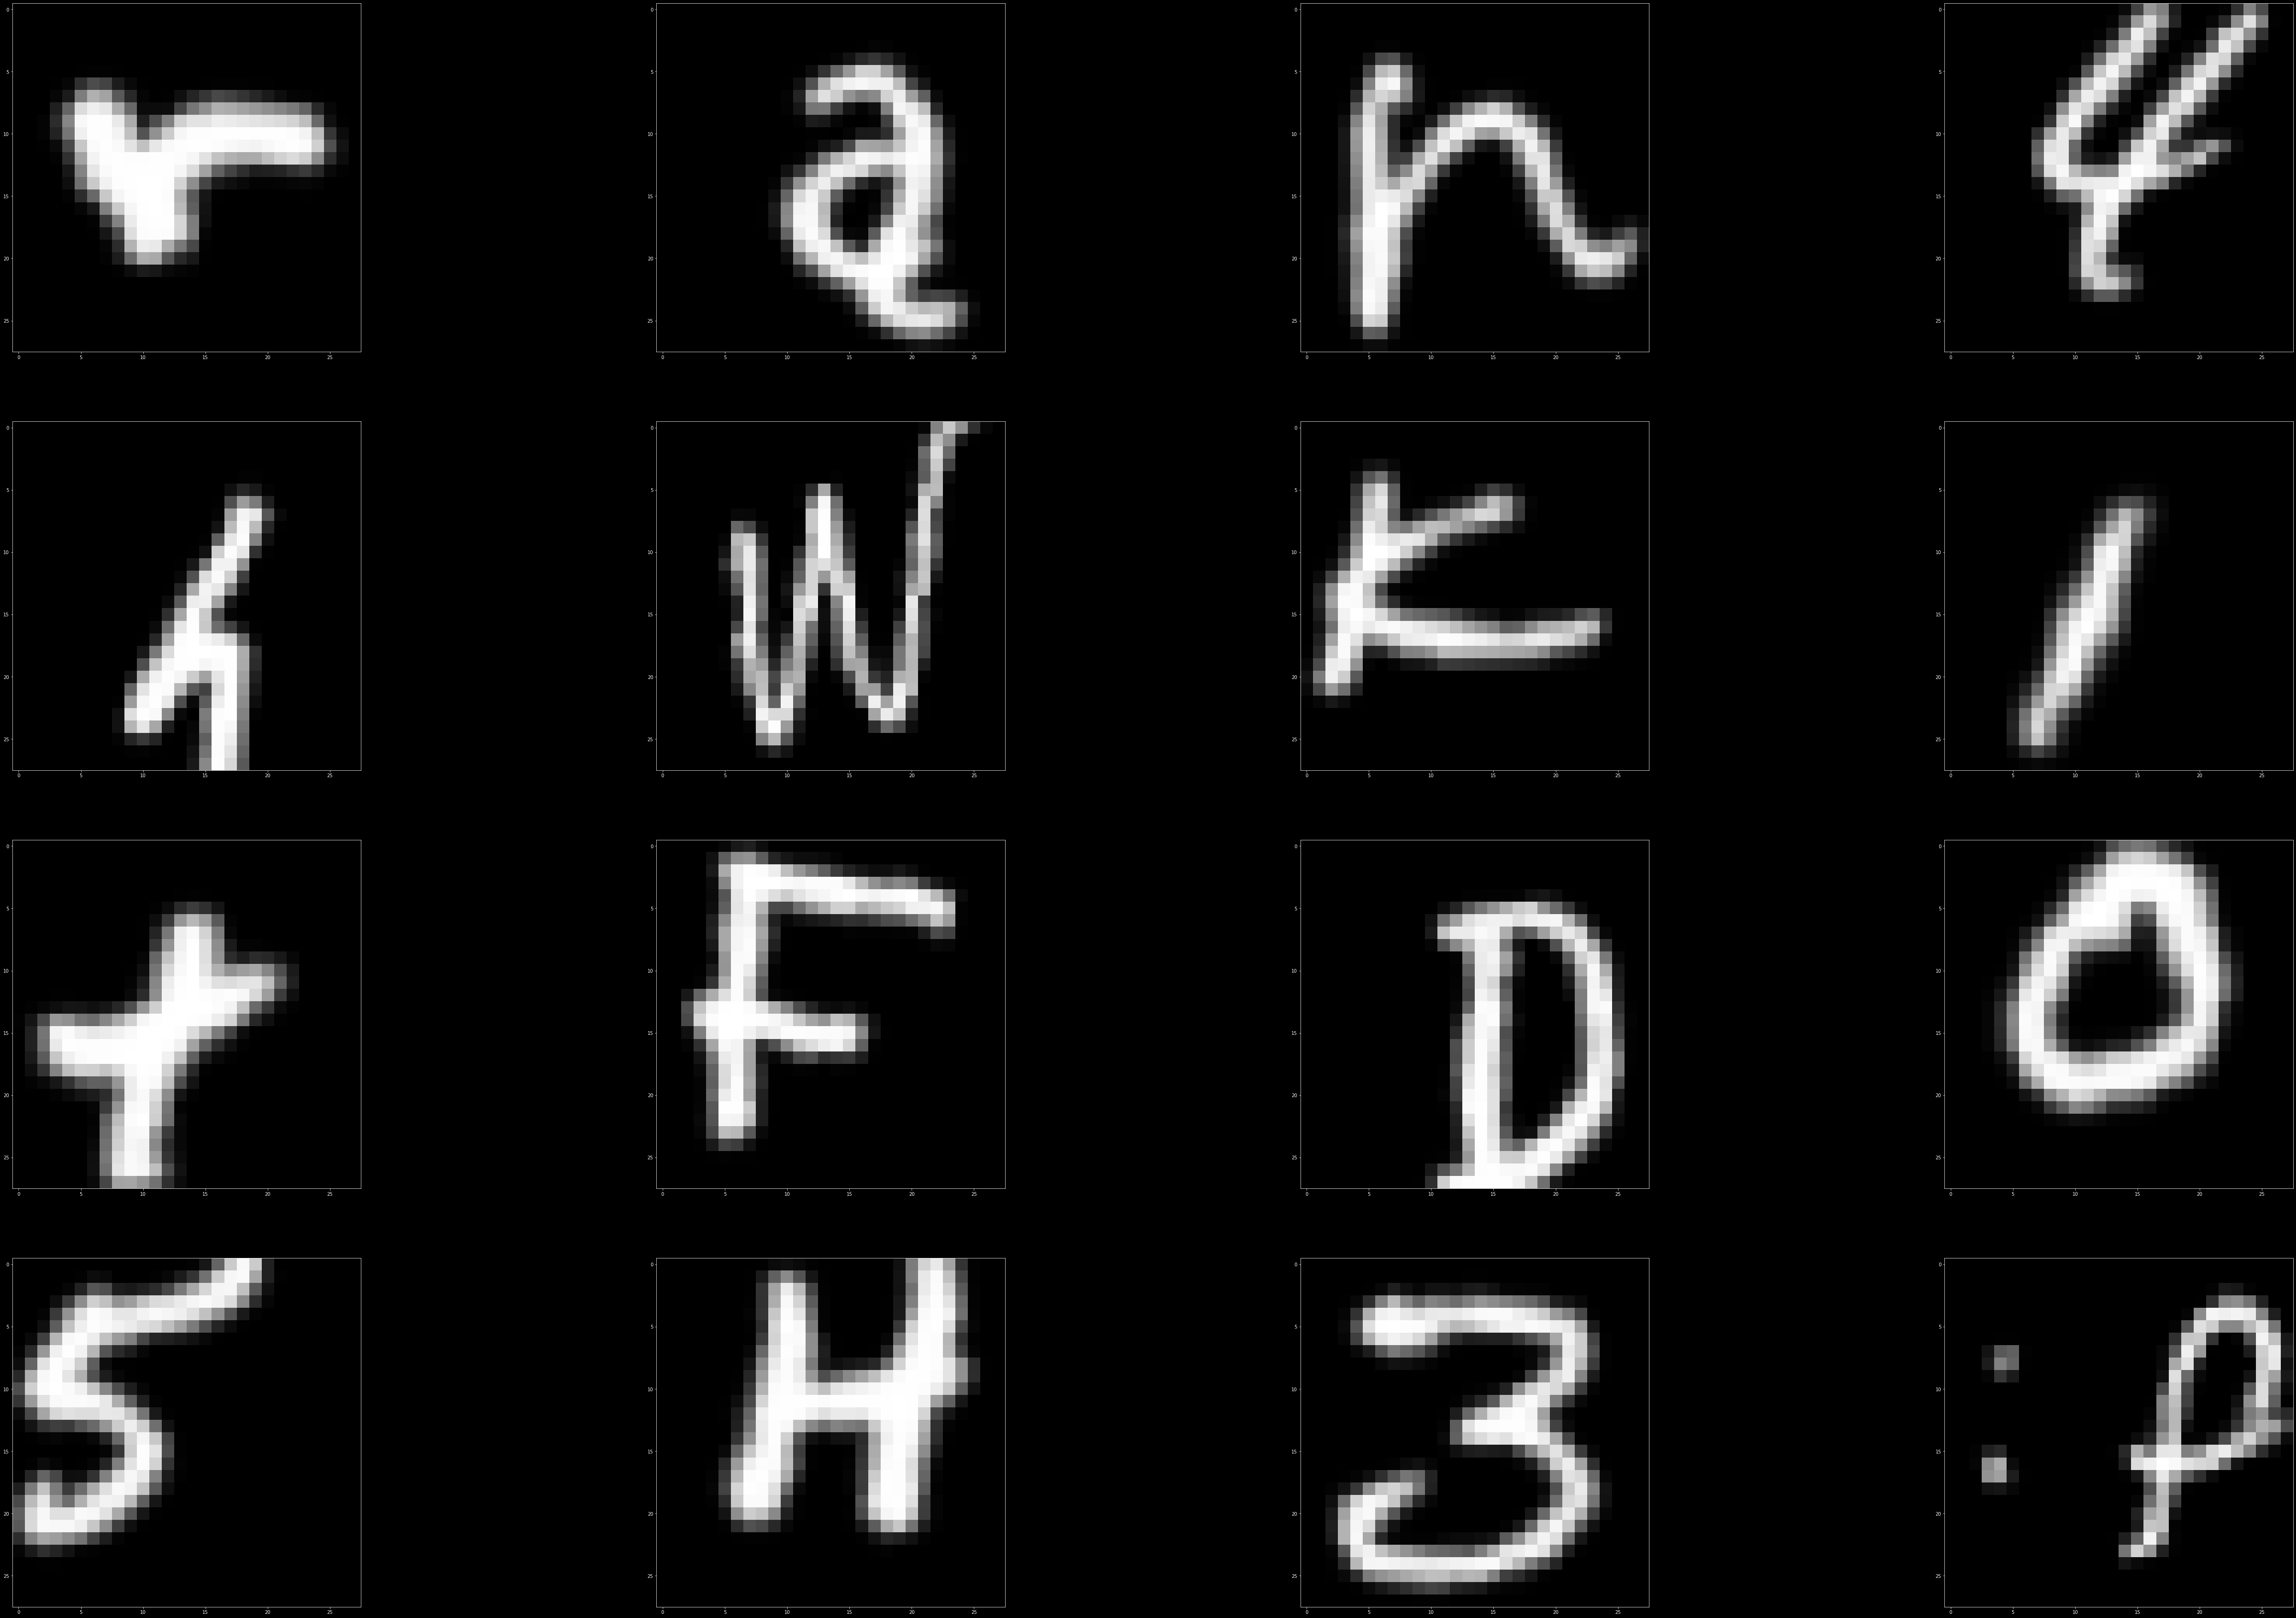

In [43]:
aug = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
	width_shift_range=0.15, height_shift_range=0.15,
    )

i = 0
imgs = []
for l,v in zip(labels,images):
        if r.random()<0.1:
            continue
        v = np.reshape(np.array(v),(28,28,1))
        v = aug.random_transform(v)
        v = np.reshape(v,(28,28))
        imgs.append(v)
        i = i + 1
        if i == 16:
                break

show_images(imgs,cols=4)

In [51]:
t = time.time()
begin = 0
last = 100
model.fit_generator(aug.flow(x_train,y_train),epochs=last,verbose=2,validation_data=(x_val,y_val), 
    initial_epoch=begin)

print("Training took",time.time() - t)
model.save("modelfile_emnist")

Epoch 1/100
2820/2820 - 31s - loss: 0.9120 - acc: 0.7021 - val_loss: 0.6984 - val_acc: 0.7586
Epoch 2/100
2820/2820 - 31s - loss: 0.8941 - acc: 0.7072 - val_loss: 0.7138 - val_acc: 0.7560
Epoch 3/100
2820/2820 - 31s - loss: 0.8765 - acc: 0.7111 - val_loss: 0.7541 - val_acc: 0.7439
Epoch 4/100
2820/2820 - 31s - loss: 0.8672 - acc: 0.7160 - val_loss: 0.7427 - val_acc: 0.7600
Epoch 5/100
2820/2820 - 31s - loss: 0.8588 - acc: 0.7185 - val_loss: 0.7925 - val_acc: 0.7345
Epoch 6/100
2820/2820 - 31s - loss: 0.8527 - acc: 0.7213 - val_loss: 0.6800 - val_acc: 0.7668
Epoch 7/100
2820/2820 - 31s - loss: 0.8526 - acc: 0.7212 - val_loss: 0.6954 - val_acc: 0.7651
Epoch 8/100
2820/2820 - 31s - loss: 0.8384 - acc: 0.7257 - val_loss: 0.6698 - val_acc: 0.7758
Epoch 9/100
2820/2820 - 31s - loss: 0.8379 - acc: 0.7233 - val_loss: 0.7603 - val_acc: 0.7557
Epoch 10/100
2820/2820 - 31s - loss: 0.8410 - acc: 0.7227 - val_loss: 0.9837 - val_acc: 0.6841
Epoch 11/100
2820/2820 - 31s - loss: 0.8336 - acc: 0.7277 -

KeyboardInterrupt: 

In [52]:
model.save("modelfile_emnist")